In [1]:
import pandas as pd

A = pd.read_json("final.json")
df=pd.DataFrame(A, columns=[ 'volume', 'gelo', 'percgel', 'percin', 'percat', 'difpercatin',
       'preop', 'prein', 'preat', 'presup', 'difsupperc', 'preres',
       'difresperc', 'difquenta', 'qualymes', 'rmaxtu', 'favor', 'volmom',
       'relvolmom', 'reltrade', 'trades', 'acumperc', 'maxperc', 'minperc',
       'difmm', 'aumeperc', 'final'
]) ##columns=[]  

A.columns
#df.columns
#'percgel',  'difquenta',  'rmaxtu', 'difmm', 'aumeperc'
#'acumperc','aumeperc'
#'rmaxtu'



Index(['cry', 'volume', 'gelo', 'desde', 'percgel', 'percin', 'percat',
       'difpercatin', 'inv15', 'preop', 'prein', 'preat', 'presup',
       'difsupperc', 'preres', 'difresperc', 'difquenta', 'classe', 'qualymes',
       'rmaxtu', 'favor', 'volmom', 'relvolmom', 'reltrade', 'trades', 'recup',
       'perda', 'acumperc', 'maxperc', 'minperc', 'primeiro', 'difmm',
       'aumeperc', 'final'],
      dtype='object')

In [2]:
X=df[df.columns[:-1]]
Y=df[df.columns[-1:]]



In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2)

print(len(X_train),len(X_test))

255 64


In [4]:
from sklearn.linear_model import LinearRegression

funcao_regressao=LinearRegression()

funcao_regressao.fit(X_train,Y_train)




LinearRegression()

In [5]:
funcao_regressao.score(X_train, Y_train)

0.8701161023795952

In [6]:
Previsoes= funcao_regressao.predict(X_test)
import numpy as np
from sklearn import metrics

print('RMSE', np.sqrt(metrics.mean_squared_error(Y_test, Previsoes)))

RMSE 0.0886305970400307


In [7]:
'''
print(funcao_regressao.predict([[1.0]]));
'''
import statsmodels.api as sm

est=sm.OLS(Y,X).fit()
est.params

C:\Users\linka\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


volume         0.000092
gelo           0.014186
percgel        0.065072
percin         2.490518
percat        -2.490379
difpercatin    1.642754
preop         -0.000309
prein         -0.001163
preat         -0.007913
presup        -0.009241
difsupperc    -0.010925
preres         0.004423
difresperc     0.041474
difquenta     -0.041705
qualymes       0.000004
rmaxtu         0.070081
favor         -0.008566
volmom        -0.000169
relvolmom      0.000043
reltrade      -0.000750
trades         0.000138
acumperc       1.714459
maxperc       -0.021454
minperc        0.017506
difmm         -0.038960
aumeperc      -0.120444
dtype: float64

In [8]:
est.rsquared_adj

0.8506846068432307

In [9]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  final   R-squared (uncentered):                   0.862
Model:                            OLS   Adj. R-squared (uncentered):              0.851
Method:                 Least Squares   F-statistic:                              73.70
Date:                Sat, 19 Feb 2022   Prob (F-statistic):                   4.40e-111
Time:                        01:07:23   Log-Likelihood:                          332.71
No. Observations:                 319   AIC:                                     -615.4
Df Residuals:                     294   BIC:                                     -521.3
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
volume       9.192e-05      0.000      0.476      0.635      -0.000       0.000
gelo            0.0142      0.023      0.630      0.529      -0.030       0.059
percgel         0.0651      0.051      1.283      0.200      -0.035       0.165
percin          2.4905      1.817      1.371      0.171      -1.085       6.066
percat         -2.4904      1.817     -1.371      0.171      -6.065       1.085
difpercatin     1.6428      1.806      0.909      0.364      -1.912       5.198
preop          -0.0003      0.003     -0.122      0.903      -0.005       0.005
prein          -0.0012      0.013     -0.090      0.929      -0.027       0.024
preat          -0.0079      0.028     -0.281      0.779      -0.063       0.047
presup         -0.0092      0.036     -0.257      0.798      -0.080       0.062
difsupperc     -0.0109      0.011     -0.967      0.334      -0.033       0.011
preres          0.0044      0.034      0.129      0.897      -0.063       0.072
difresperc      0.0415      0.022      1.855      0.065      -0.003       0.085
difquenta      -0.0417      0.028     -1.495      0.136      -0.097       0.013
qualymes     3.612e-06   2.74e-06      1.320      0.188   -1.77e-06       9e-06
rmaxtu          0.0701      0.028      2.520      0.012       0.015       0.125
favor          -0.0086      0.006     -1.436      0.152      -0.020       0.003
volmom         -0.0002      0.000     -0.610      0.542      -0.001       0.000
relvolmom    4.337e-05      0.000      0.216      0.829      -0.000       0.000
reltrade       -0.0008      0.002     -0.352      0.725      -0.005       0.003
trades          0.0001      0.000      0.778      0.437      -0.000       0.000
acumperc        1.7145      0.152     11.291      0.000       1.416       2.013
maxperc        -0.0215      0.057     -0.374      0.708      -0.134       0.091
minperc         0.0175      0.052      0.338      0.735      -0.084       0.119
difmm          -0.0390      0.018     -2.211      0.028      -0.074      -0.004
aumeperc       -0.1204      0.065     -1.861      0.064      -0.248       0.007
==============================================================================
Omnibus:                       91.514   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              750.602
Skew:                           0.923   Prob(JB):                    1.02e-163
Kurtosis:                      10.285   Cond. No.                     1.36e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specif

In [84]:
resultado= est.predict()
resultado
#print (pd.crosstab(Y_test, resultado, rownames=['Real'], colnames=['Predito'], margins=True))

array([-0.38875159, -0.38913803, -0.38913803, -0.3817958 , -0.38797873,
       -0.38836516, -0.386433  , -0.386433  , -0.38681943, -0.38913803,
       -0.38913803, -0.39029733, -0.38952446, -0.38759229, -0.38836516,
       -0.38681943, -0.3841144 , -0.38875159, -0.39338879, -0.38875159,
       -0.38836516, -0.38681943, -0.38991089, -0.386433  , -0.386433  ,
       -0.38720586, -0.38759229, -0.38759229, -0.386433  , -0.386433  ,
       -0.38875159, -0.38836516, -0.38759229, -0.38991089, -0.38681943,
       -0.38720586, -0.38952446, -0.38836516, -0.38488726, -0.38720586,
       -0.38913803, -0.38952446, -0.38720586, -0.38875159, -0.39145662,
       -0.38759229, -0.38759229, -0.38759229, -0.38875159, -0.38875159,
       -0.38913803, -0.38720586, -0.38797873, -0.38836516, -0.38836516,
       -0.39068376, -0.38450083, -0.386433  , -0.386433  , -0.38836516,
       -0.38952446, -0.38836516, -0.39107019, -0.38720586, -0.38759229,
       -0.38913803, -0.38681943, -0.38372796, -0.38681943, -0.38

In [85]:
quantos=320
for index in range(quantos):
    qualcry= pd.DataFrame(A, columns=['cry'],index=[index])
    qualtava= pd.DataFrame(A, columns=['final'],index=[index])
    print(qualcry, qualtava,resultado[index])


     cry
0  1INCH    final
0 -0.613 -0.3887515934874059
    cry
1  AAVE    final
1 -0.871 -0.3891380264829202
   cry
2  ACA    final
2 -0.247 -0.3891380264829202
   cry
3  ACH    final
3  3.094 -0.38179579956814813
   cry
4  ACM    final
4  0.293 -0.38797872749637724
   cry
5  ADA    final
5 -0.361 -0.3883651604918915
   cry
6  ADX    final
6 -0.585 -0.38643299551432
    cry
7  AGLD    final
7 -1.249 -0.38643299551432
    cry
8  AION    final
8 -0.378 -0.38681942850983425
    cry
9  AKRO    final
9 -0.402 -0.3891380264829202
     cry
10  ALCX     final
10 -1.099 -0.3891380264829202
     cry
11  ALGO     final
11 -0.155 -0.39029732546946316
      cry
12  ALICE     final
12  0.227 -0.38952445947843456
       cry
13  ALPACA     final
13  -0.15 -0.3875922945008629
      cry
14  ALPHA     final
14 -0.583 -0.3883651604918915
    cry
15  AMP     final
15 -0.551 -0.38681942850983425
    cry
16  ANC     final
16 -0.554 -0.38411439754123405
     cry
17  ANKR     final
17  1.724 -0.38875159348740

Text(0, 0.5, 'final')

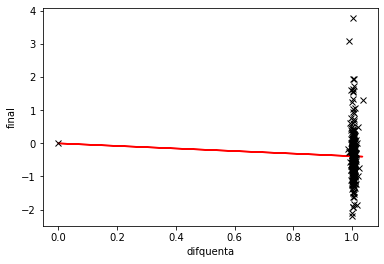

In [87]:

import matplotlib.pyplot as plt
##plt.figure(figsize=(10,10))
##plt.scatter(X_train, Y_train)
##plt.plot(X_test, funcao_regressao.predict(X_test), color='red')
plt.plot(df['difquenta'], est.predict(),'r-', label='predicted' )
plt.plot(df['difquenta'], df['final'], 'kx', label='data'  )
plt.xlabel('difquenta')
plt.ylabel('final')